1.	Create a new empty Jupyter Notebook.

2.	Import all the modules required for:
◦ numpy
◦ pandas
◦ matplotlib
◦ seaborn
◦ LinearRegression

In [34]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")


3.	Read the height_mass.csv file into a Pandas DataSet called: people ◦ Use the pandas read_csv method.

In [35]:
df = pd.read_csv('data/height_mass.csv')
df

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


4.	Use a Seaborn histplot to show the distribution for Mass.
◦ https://seaborn.pydata.org/generated/seaborn.histplot.html 
◦ Experiment with different bin #’s and find which one gives you the clearest information about the data.
◦ What does the plot tell you about the data? Be specific. Don’t focus on the numbers as much as the visual attributes.
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.

<Axes: xlabel='Mass (kg)', ylabel='Count'>

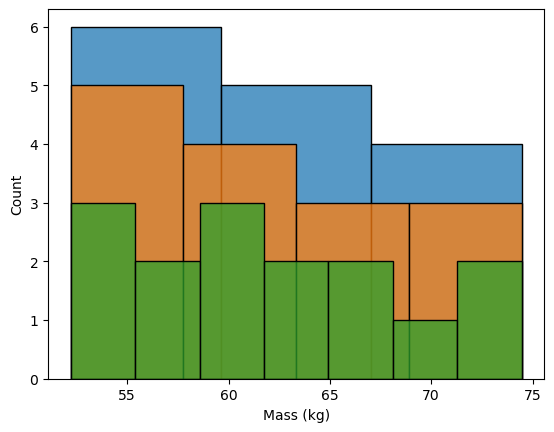

In [36]:
sns.histplot(data=df, x='Mass (kg)', bins=3)
sns.histplot(data=df, x='Mass (kg)', bins=4)
sns.histplot(data=df, x='Mass (kg)', bins=7)

<b>Table observations:</b>

Here the distrubition is fairly even, but skewed to the right. A visual trend is as we increase the number of bins, the distribution evens out.

5.	Use a Seaborn histplot to show the distribution for Height.
◦ Experiment with different bin #’s and find which one gives you the clearest information about the data.
◦ What does the plot tell you about the data? Be specific. Don’t focus on the numbers as much as the visual attributes.
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.

<Axes: xlabel='Height (m)', ylabel='Count'>

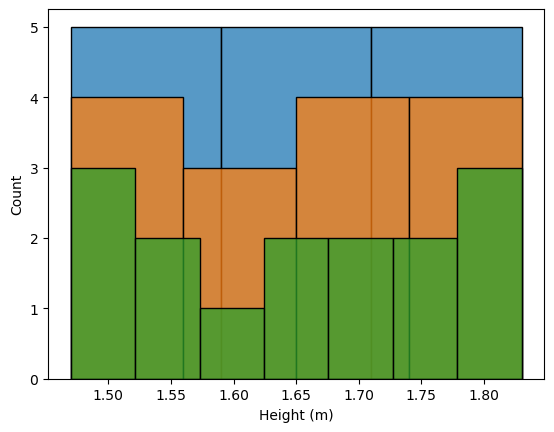

In [37]:
sns.histplot(data=df, x='Height (m)', bins=3)
sns.histplot(data=df, x='Height (m)', bins=4)
sns.histplot(data=df, x='Height (m)', bins=7)

<b>Table Observations</b>

This seems evenly distributed, but as we add more bins the distribution becomes more un-even

6.	Use a Seaborn jointplot to plot x=Height, y=Mass ◦ If you get warnings, use named arguments like:
▪ jointplot(x=”x axis column name”, y=”y axis column name”) ◦ Does this plot confirm what the histplot showed?
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.

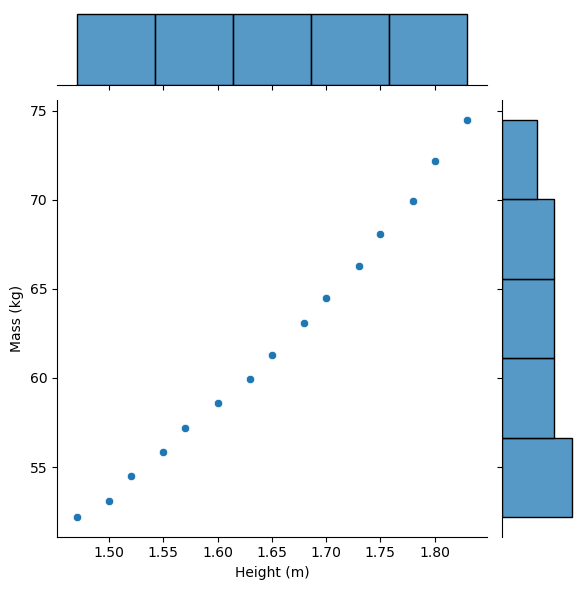

In [38]:
sns.jointplot(data=df, x='Height (m)', y='Mass (kg)')

<b>Observations</b>

There is more people with lower weight, and higher height generally corresponds to higher Weight

7.	Split the data into training and testing data, using appropriate variable names.
◦ Prepare your x and y:
▪ x: Drop the Mass column.
▪ y: Specify the Mass column.
◦ Use sklearn train_test_split to split the data.

In [39]:
from sklearn.model_selection import train_test_split

# Prepare x and y
x = df.drop('Mass (kg)', axis=1)
y = df['Mass (kg)']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
display(x_train, x_test, y_train, y_test)

,Height (m)
13,1.80
5,1.60
8,1.68
2,1.52
1,1.50
14,1.83
4,1.57
7,1.65
10,1.73
12,1.78


,Height (m)
9,1.70
11,1.75
0,1.47


13    72.19
5     58.57
8     63.11
2     54.48
1     53.12
14    74.46
4     57.20
7     61.29
10    66.28
12    69.92
3     55.84
6     59.93
Name: Mass (kg), dtype: float64

9     64.47
11    68.10
0     52.21
Name: Mass (kg), dtype: float64

8.	Create the model and fit it to the training data. ◦ Create a sklearn LinearRegression model.
◦ Use the fit method to fit it to the training data.

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

9.	Predict values based on testing data.
◦ Use the predict method to predict values with the x testing data.

In [41]:
model.predict(x_test)

array([65.14531356, 68.30189952, 50.62501816])

10. Print out error metrics:
◦ Mean Absolute Error (MAE)
◦ Mean Squared Error (MSE)
◦ Root Mean Squared Error (RMSE)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict values based on testing data
y_pred = model.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

display(mae, mse, rmse)

0.8207316384180791

1.0029930838678223

1.0014954237877587

LinearRegression()

11. Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.
◦ Use the predict method and feed it a 2d array like: [[1.70]]
◦ Add a markdown cell and explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers. Superficial answers will lose marks.

In [51]:
specific_height = df["Height (m)"].sample(1)
specific_height = np.array(specific_height).reshape(-1, 1)

print(specific_height)
predicted_weight = model.predict(specific_height)
print(predicted_weight)
print(df"specific_height")


[[1.83]]
[73.35243705]


12. Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True).
◦ If you get warnings, use named arguments like:
▪ lmplot(x=”x axis column name”, y=”y axis column name”) ◦ Does this plot support your observations from task #6?
◦ Insert a markdown cell and note your observations. Superficial answers will lose marks.

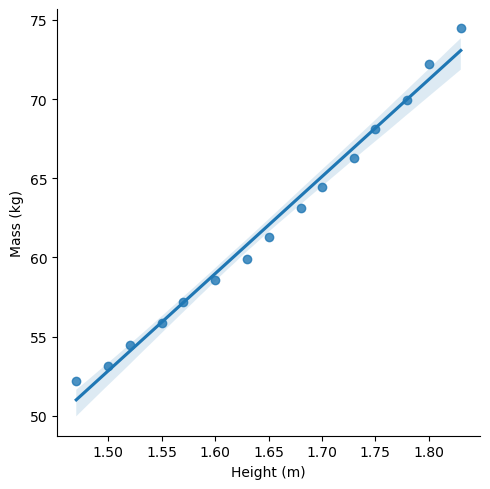

In [44]:
sns.lmplot(data=df, x='Height (m)', y='Mass (kg)')